___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente, com alguns filmes recentes com orçamentos de até 400 milhões de dólares, o objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.


___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados que serão utilizados serão o revenue, budget e release date. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos e o release date é a data de lançamento mundial no formato dia/mês/ano

In [164]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [165]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps_2018\ciencia_dos_dados\DPCD-master\Projeto3


### BASE DE DADOS

In [166]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes

In [167]:
for i in range (len(nndf)): #Deixa a data de lançamento como mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### ANÁLISE DESCRITIVA

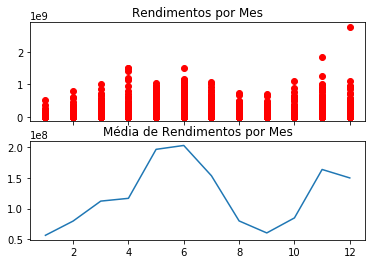

In [168]:
f, axarr = plt.subplots(2, sharex=True)

Y = nndf['revenue']
X = nndf[['release_date']]
axarr[0].plot(X,Y,'ro')
axarr[0].set_title('Rendimentos por Mes')

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
axarr[1].plot(X2,Y2)
axarr[1].set_title('Média de Rendimentos por Mes')

plt.show()

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio.

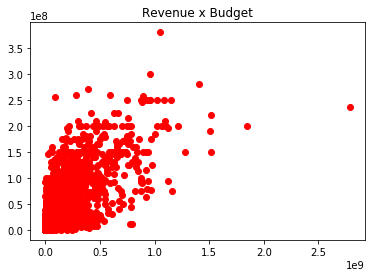

In [169]:
plt.plot(nndf['revenue'],nndf['budget'],'ro')
plt.title('Revenue x Budget')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [170]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.75*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.75*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

print("Valores para o dataframe de treinamento\n",DfTrain.describe())
print("\nValores para o dataframe de teste\n",DfTest.describe())

Valores para o dataframe de treinamento
             revenue        budget
count  2.421000e+03  2.421000e+03
mean   1.517634e+08  5.243642e+07
std    2.039237e+08  4.542646e+07
min    1.100000e+01  1.100000e+01
25%    3.264555e+07  2.000000e+07
50%    8.325823e+07  3.700000e+07
75%    1.810000e+08  6.900000e+07
max    2.787965e+09  3.800000e+08

Valores para o dataframe de teste
             revenue        budget
count  8.080000e+02  8.080000e+02
mean   2.979493e+07  5.352265e+06
std    5.444615e+07  5.649416e+06
min    5.000000e+00  1.000000e+00
25%    3.138176e+06  2.000000e+06
50%    1.161523e+07  4.619392e+06
75%    3.257273e+07  7.500000e+06
max    7.929106e+08  8.600000e+07


As médias e desvios padrão para ambos os dataframes são muito próximos, dessa forma, é possível dizer que ambos tem as mesmas características e serão menos suscetíveis a overfitting e underfitting.  

In [251]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
X =DfTrain[['release_date','budget']].round(0).astype(int)
X=X.values.reshape((len(X),2))
Y = DfTrain['revenue'].round(0).astype(int)
Y=Y.values.reshape((len(Y),1))

In [252]:

X = sm.add_constant(X)
model= sm.OLS(Y,X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     944.3
Date:                Fri, 01 Jun 2018   Prob (F-statistic):          8.52e-304
Time:                        20:17:18   Log-Likelihood:                -49006.
No. Observations:                2421   AIC:                         9.802e+04
Df Residuals:                    2418   BIC:                         9.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.083e+06   7.84e+06     -1.159      0.247   -2.44e+07    6.28e+06
x1          9.295e+05   8.99e+05      1.034      0.301   -8.33e+05    2.69e+06
x2             2.9088      0.067     43.440      0.000       2.778       3.040
==============================================================================
Omnibus:                      825.411   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77721.909
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                      30.728   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SyntaxError: invalid syntax (<ipython-input-253-7d9d25f71cb8>, line 1)

In [254]:


lm = linear_model.LinearRegression()
model = lm.fit(X,Z)
predictions = lm.predict(X)
predictions


array([[ 12.00000003],
       [  5.00000004],
       [ 10.00000003],
       ..., 
       [  4.99999999],
       [  9.99999999],
       [  7.99999999]])

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - 
Acessado em 28/05/2018

http://scikit-learn.org/stable/modules/linear_model.html Acessado em 28/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018